In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [3]:
data=pd.read_csv("C:\\Users\\MARIEM\\1essaie\\newMl.csv")

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
y=data['']

KeyError: 'target'

In [5]:
X=data.drop(columns='target',axis=1)

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(X)

NameError: name 'X' is not defined

In [58]:
scaled_features1 = scaler.transform(X)

D:\conda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [59]:
X=pd.DataFrame(scaled_features1,columns=X.columns)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=2)

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
# load data

array = data.values
Xe = X.values
Ye = y.values
# feature extraction
model = ExtraTreesClassifier()
model.fit(Xe, Ye)
l=model.feature_importances_

D:\conda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
from collections import Counter

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)


rus = RandomUnderSampler(random_state=42)
X_test, y_test= rus.fit_resample(X_test, y_test)



In [64]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)


In [65]:
#//hamming=(i for i in range(24))

#differance=X.describe().iloc[1]
def distance1(x,y):
    diffs=0
    for i in range (min(len(x),len(y))):
        diffs += pow((x[i]-y[i]), 2)     
    return math.sqrt(diffs)
  

In [66]:
def distance2(x,y):
    diffs = 0
    for i in range (min(len(x),len(y))):
        if(x[i]!=y[i]):
            diffs += 1
    return diffs

In [67]:
d1=[0,1,6,7,9,14]
def distance(x,y):
    diffs=0
    for i in range (min(len(x),len(y))):
        if i in d1 :
            if(x[i]!=y[i]):
            
                diffs += pow((x[i]-y[i]), 2)*l[i]*100
        else :
            if(x[i]!=y[i]):
                diffs += l[i]*100
    return math.sqrt(diffs)

In [68]:
def myFunc(e):
    return e[0]
def predictX(x,kl):
    distances=[]
    un=0
    for i in range(0, len(X_train)):
        distances.append((distance(X_train.iloc[i],x),y_train.iloc[i]))
    
        
    distances.sort(key=myFunc)
  
    
    for d in distances[0:kl]:
        if int(d[1]==1):
            un+=1
      
    if(un > (kl/2)):
        return 1
    else :
        return 0


In [69]:
def predictY(y,k):
    result=[]
    for i in range(len(y)):
        
        result.append(predictX(y.iloc[i],k))
    return np.array(result)

In [70]:
t=predictY(X_test,1)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(confusion_matrix(y_test,t))

[[14 22]
 [ 9 27]]


In [73]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    pred_i = predictY(X_test,i)
    error_rate.append(np.mean(pred_i != y_test))
   

Text(0, 0.5, 'Error Rate')

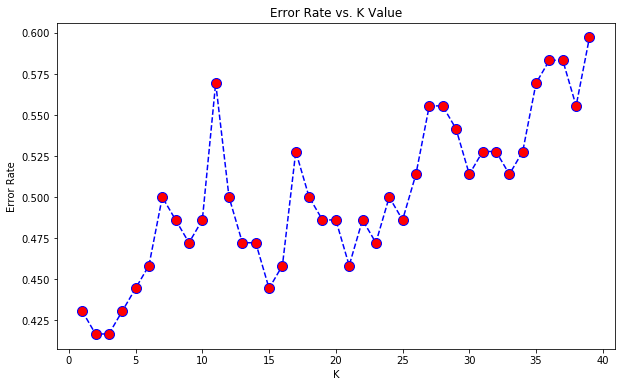

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
error_rate2 = []


In [77]:

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate2.append(np.mean(pred_i != y_test))

D:\conda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
D:\conda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
D:\conda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
D:\conda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
D:\conda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

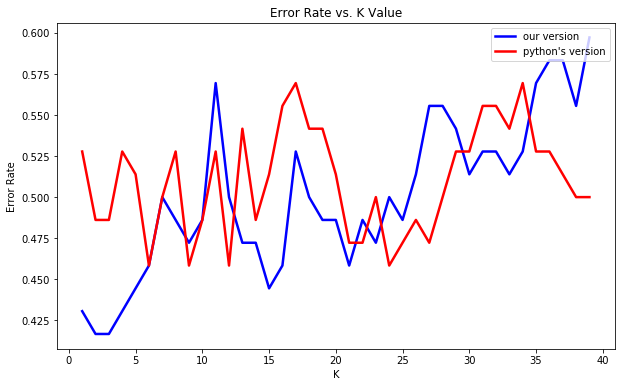

In [78]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate, color="blue", linewidth=2.5, linestyle="-", label="our version")
plt.plot(range(1,40),error_rate2, color="red",  linewidth=2.5, linestyle="-", label="python's version")

plt.legend(loc='upper right')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


plt.show()

In [79]:
pred=predictY(X_test,2)

In [28]:
#print(confusion_matrix(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))



[[43 21]
 [30 34]]
